In [1]:
import os
from dotenv import load_dotenv
load_dotenv()

from typing import Annotated, Sequence, Literal
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage, HumanMessage, AIMessage, SystemMessage
from langgraph.graph.message import add_messages
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode, tools_condition

from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langchain.messages import AIMessage
from langchain_classic import hub  # (you used langchain_classic in your file)

In [9]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_google_genai import ChatGoogleGenerativeAI , GoogleGenerativeAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [10]:
embeddings = GoogleGenerativeAIEmbeddings(model="models/text-embedding-004")
llm = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")

In [11]:
print(llm.invoke("Hey , who are you ??"))
print(embeddings.embed_query("Hey , who are you ??"))

content='I am a large language model, trained by Google.' additional_kwargs={} response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'} id='lc_run--5a8c74d3-29c6-4377-a2cc-a99c85906e13-0' usage_metadata={'input_tokens': 7, 'output_tokens': 244, 'total_tokens': 251, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 233}}
[0.012518692761659622, -0.03623774275183678, -0.03517773747444153, 0.027096299454569817, 0.00037546473322436213, 0.037958353757858276, 0.05115729942917824, 0.04442358389496803, 0.028012443333864212, 0.01885560154914856, -0.09148337692022324, -0.016658557578921318, 0.04837500676512718, -0.031365275382995605, -0.03341354429721832, -0.04911463335156441, -0.026846593245863914, 0.028125353157520294, -0.08439544588327408, -0.0829039141535759, 0.016194429248571396, -0.009853485971689224, -0.012983525171875954, 

In [12]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs

[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]]

In [13]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retriever=vectorstore.as_retriever()

In [14]:
retriever.invoke("what is langgraph")

### Retriever To Retriever Tools
# from langchain.tools.retriever import create_retriever_tool
from langchain_core.tools.retriever import create_retriever_tool
retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

retriever_tool

Tool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=functools.partial(<function _get_relevant_documents at 0x000002207E11DD00>, retriever=VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000022075E48830>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, template='{page_content}'), document_separator='\n\n', response_format='content'), coroutine=functools.partial(<function _aget_relevant_documents at 0x000002207E11DE40>, retriever=VectorStoreRetriever(tags=['FAISS', 'GoogleGenerativeAIEmbeddings'], vectorstore=<langchain_community.vectorstores.faiss.FAISS object at 0x0000022075E48830>, search_kwargs={}), document_prompt=PromptTemplate(input_variables=['page_content'], input_types={}, partial_variables={}, temp

In [33]:
# langchain_urls=[
#     "https://medium.com/munchy-bytes/exploring-langchain-ff13fff63340",
#     "https://medium.com/@vikrampande783/introduction-to-langchain-9e09aae37e62",
# ]

langchain_urls=[
    "https://www.elastic.co/blog/langchain-tutorial"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://www.elastic.co/blog/langchain-tutorial', 'title': 'LangChain tutorial: An intro to building LLM-powered apps | Elastic Blog', 'description': 'Unlock the potential of LangChain with this step-by-step LangChain tutorial. Learn how to build AI-powered apps from scratch and start creating today....', 'language': 'en'}, page_content='LangChain tutorial: An intro to building LLM-powered apps | Elastic BlogSkip to main contentTable of ContentsTable of contentsLangChain tutorial: A guide to building LLM-powered applicationsLangChain explainedHow does LangChain work?Core concepts of LangChainComponents and modulesIntegration with LLMsWorkflow managementSetting up LangChainInstallation and configurationDeveloping applications with LangChainStep 1: Import the OpenAI class from LangChainStep 2: Define a functional read data from a text file:Step 3: Initialize the OpenAI modelStep 4: Define a function to request a response from OpenAIStep 5: Read data from th

In [34]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=embeddings
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [35]:
from langchain_core.tools.retriever import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

tools=[retriever_tool,retriever_tool_langchain]

In [36]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage

from langgraph.graph.message import add_messages
# ----------------
# 1) STATE
# ----------------
class AgentState(TypedDict):
    # Append new messages rather than replace
    messages: Annotated[Sequence[BaseMessage], add_messages]
    # Loop guard counter for rewrite → agent cycles
    attempts: int

In [37]:
# ----------------
# 2) ENRICHED PROMPTS
# ----------------

# 2a) System prompt for the "agent" node (tool orchestration)
AGENT_SYSTEM_PROMPT = """\
You are an agent orchestrating a Retrieval-Augmented Generation (RAG) workflow.

Core rules:
- Decide whether to use a retriever tool based on the user question and conversation state.
- Prefer using tools when the question requires facts, definitions, documentation, or content that should be grounded in sources.
- If the best answer is common knowledge and you are confident, you MAY answer directly, but keep answers brief and non-speculative.
- NEVER fabricate citations. If you use tool results, cite the sources clearly (e.g., “Source: <doc-title-or-URL>”).
- If retrieved documents are irrelevant, ask for clarification or propose a better query (the graph will route to rewrite).
- Be concise, accurate, and helpful. If you are uncertain, say so and propose next steps.

Output formatting:
- Use clear, short paragraphs and bullet points where helpful.
- Include sources only when you’ve grounded content on retrieved context.
"""

# 2b) Enriched RAG answer prompt (used in `generate`)
RAG_PROMPT = PromptTemplate(
    template=(
        "You are a careful assistant answering the user's question using ONLY the provided context.\n\n"
        "Question:\n{question}\n\n"
        "Context (retrieved passages):\n{context}\n\n"
        "Instructions:\n"
        "- Ground your answer strictly in the context above; do not invent facts.\n"
        "- If the context is insufficient, explicitly say what is missing and propose what to retrieve next.\n"
        "- Summarize and synthesize across passages; do not quote excessively unless necessary.\n"
        "- Include concise citations for any factual claims derived from the context. Use this style:\n"
        "    • Source: <short-title-or-URL>\n"
        "- Keep the tone professional and clear. Prefer bullet points if listing items.\n"
        "- If there are multiple interpretations or edge cases, surface them explicitly.\n\n"
        "Answer:"
    ),
    input_variables=["question", "context"],
)

# 2c) Enriched relevance grader prompt (used in `grade_documents`)
RELEVANCE_GRADER_PROMPT = PromptTemplate(
    template=(
        "You are evaluating whether a retrieved document is relevant to the user's question.\n\n"
        "User question:\n{question}\n\n"
        "Retrieved document content:\n{context}\n\n"
        "Guidelines:\n"
        "- Consider semantic relevance: concepts, definitions, mechanisms, workflows, APIs, or terminology that directly answer or clarify the question.\n"
        "- Superficial keyword overlaps WITHOUT substantive connection are NOT sufficient.\n"
        "- Exact match is not required; paraphrases or closely related explanations count as relevant.\n"
        "- If the document discusses a different library, tool, version, or unrelated topic, grade it as NOT relevant.\n"
        "- Be conservative: prefer 'no' unless you see a clear path to answer the question using the document.\n\n"
        "Provide a binary score: 'yes' if relevant, 'no' if not."
    ),
    input_variables=["context", "question"],
)

# 2d) Enriched rewrite prompt (used in `rewrite`)
REWRITE_PROMPT_TEMPLATE = """\
You are improving a user query for a RAG system.

Task:
- Infer the underlying intent and information need.
- Identify domain-specific terms, entities, APIs, features, or frameworks related to the question.
- Add clarifying constraints only if they are implied (e.g., version, scope, type of output).
- Remove ambiguity and make the query more retrievable.
- Keep it concise and specific (ideally one sentence).

Original question:
-------
{question}
-------

Return ONLY the improved query, no explanations.
"""


In [38]:
# ----------------
# 3) NODES (agent, generate, grade_documents, rewrite) with enriched prompts
# ----------------

def agent(state: AgentState):
    """Agent decides whether to call tools (retriever) or end."""
    print("---CALL AGENT---")
    messages = list(state["messages"])
    # Prepend a system message to improve tool-use behavior
    system_msg = SystemMessage(content=AGENT_SYSTEM_PROMPT)
    messages = [system_msg] + messages

    # Bind tools as before
    # Assumes `tools` variable exists: [retriever_tool, retriever_tool_langchain]
    model = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")
    model = model.bind_tools(tools)

    response = model.invoke(messages)
    return {"messages": [response]}

In [39]:
def grade_documents(state: AgentState) -> Literal["generate", "rewrite"]:
    """Determine whether retrieved documents are relevant."""
    print("---CHECK RELEVANCE---")

    # Data model for structured output
    from pydantic import BaseModel, Field
    class Grade(BaseModel):
        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM with structured output
    model = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")
    llm_with_tool = model.with_structured_output(Grade)

    messages = state["messages"]
    last_message = messages[-1]

    # Extract last HumanMessage as question
    question = None
    for msg in reversed(messages):
        if isinstance(msg, HumanMessage):
            question = msg.content
            break
    if question is None:
        question = messages[0].content

    docs = last_message.content
    chain = RELEVANCE_GRADER_PROMPT | llm_with_tool
    scored_result = chain.invoke({"question": question, "context": docs})
    score = scored_result.binary_score.strip().lower()

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"
    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        return "rewrite"

In [40]:
def generate(state: AgentState):
    """Generate grounded answer using enriched RAG prompt."""
    print("---GENERATE---")

    messages = state["messages"]

    # Extract last HumanMessage as question
    question = None
    for msg in reversed(messages):
        if isinstance(msg, HumanMessage):
            question = msg.content
            break
    if question is None:
        question = messages[0].content

    # Last tool output contains retrieved docs
    last_message = messages[-1]
    docs = last_message.content

    model = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")
    rag_chain = RAG_PROMPT | model | StrOutputParser()
    response = rag_chain.invoke({"context": docs, "question": question})

    return {"messages": [AIMessage(content=response)]}

In [41]:
def rewrite(state: AgentState):
    """
    Transform the query to produce a better question, but only if attempts < 3.
    If attempts >= 3, skip the LLM call and just propagate the current state.
    """
    current_attempts = state.get("attempts", 0)

    # Guard BEFORE any LLM call
    if current_attempts >= 2:
        print("---SKIPPING LLM CALL: max rewrite attempts reached---")
        return {"attempts": current_attempts}

    print("---TRANSFORM QUERY---")

    messages = state["messages"]
    # Extract last HumanMessage as question
    question = None
    for msg in reversed(messages):
        if isinstance(msg, HumanMessage):
            question = msg.content
            break
    if question is None:
        question = messages[0].content

    rewrite_prompt = PromptTemplate(
        template=REWRITE_PROMPT_TEMPLATE, input_variables=["question"]
    )

    model = ChatGoogleGenerativeAI(model="models/gemini-2.5-flash")
    chain = rewrite_prompt | model | StrOutputParser()
    improved_query = chain.invoke({"question": question})

    current_attempts += 1
    return {
        "messages": [HumanMessage(content=improved_query)],
        "attempts": current_attempts,
    }

In [43]:
# ----------------
# 4) ROUTING GUARD
# ----------------
def route_after_rewrite(state: AgentState) -> Literal["agent", "end"]:
    tries = state.get("attempts", 0)
    print(f"---REWRITE ATTEMPTS: {tries}---")
    if tries >= 2:
        print("---TERMINATING: max rewrite attempts reached---")
        return "end"
    return "agent"


# ----------------
# 5) GRAPH WIRING
# ----------------

workflow = StateGraph(AgentState)

# Assumes your tool setup exists:
# retriever_tool, retriever_tool_langchain, tools = [retriever_tool, retriever_tool_langchain]
retrieve = ToolNode([retriever_tool, retriever_tool_langchain])

workflow.add_node("agent", agent)       # agent (decides tools/end)
workflow.add_node("retrieve", retrieve) # retrieval
workflow.add_node("rewrite", rewrite)   # query rewriting
workflow.add_node("generate", generate) # final answer

workflow.add_edge(START, "agent")

workflow.add_conditional_edges(
    "agent",
    tools_condition,
    {"tools": "retrieve", END: END},
)

workflow.add_conditional_edges(
    "retrieve",
    grade_documents,  # returns "generate" or "rewrite"
)

workflow.add_edge("generate", END)

workflow.add_conditional_edges(
    "rewrite",
    route_after_rewrite,
    {"agent": "agent", "end": END},
)

graph = workflow.compile()

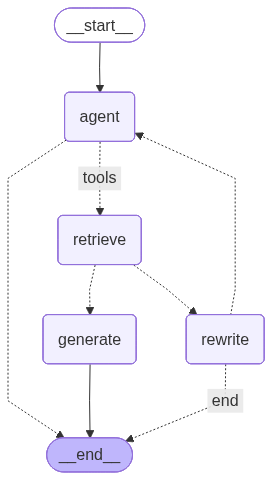

In [44]:
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))

In [45]:
# ----------------
# 6) SAFE INVOCATION (seed attempts=0)
# ----------------
graph.invoke({"messages": "What is Langgraph?", "attempts": 0})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---REWRITE ATTEMPTS: 1---
---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS NOT RELEVANT---
---TRANSFORM QUERY---
---REWRITE ATTEMPTS: 2---
---TERMINATING: max rewrite attempts reached---


{'messages': [HumanMessage(content='What is Langgraph?', additional_kwargs={}, response_metadata={}, id='4fc5b5d9-4c79-48da-984c-d8030abbde16'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'retriever_vector_db_blog', 'arguments': '{"query": "What is Langgraph?"}'}, '__gemini_function_call_thought_signatures__': {'646fd733-14be-4c3a-8a97-f4f43476e2bd': 'CpADAdHtim8ozs4PMMNQEflx9fAfYDgJMlYkIdlcv4mv/7np4Rx/2TBWaPC35oI4Ob+yxJnyCD/H0XjFba0e11OxhJgEFUav+F2GtPv/4TJPhS5VgBas5TVXRl3mKYROddhjBNzNASN8jHQv38VsDpQAKuGYSlT8XD0MOJuWZx1ocH4uXU1lRkh1SKeuMjE3YFAFpsQ9rrEH6yaQOyDIEwHUUInw+c1QD64O3BHIBdq98q1Pp6NVkIA/Zu17r5UoGmV3LS7VtUo9YJ3n+HrsfRJ3Hfdj5I31e09kIBhpPFjE4PpUzVssTmPjx4dTJ5QZoqGNdyJPc15p850rbGIOmOyoGfRmHSrr6hdrG7iSsc9HKWccSa9jJKt9Rxbs8nuSFoNQxvnznwxo53rIoYQGxaTB8s3lCSSQ+FpbA1tB9iOn8JiDp68dX9P5Z3td4eFsFQ4bMhXAUy0eHygPtq6LtO0FnEUOj89fHoXm8zWPr7TO2IjAgexz1sXLXm4u5H2STkxSv0K5WeREy6LEPyDZqqnhFw=='}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings':

In [46]:
graph.invoke({"messages": "What is Langchain?", "attempts": 0})

---CALL AGENT---
---CHECK RELEVANCE---
---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='What is Langchain?', additional_kwargs={}, response_metadata={}, id='577a62b4-197c-4b1d-8245-0a50e8668db8'),
  AIMessage(content='', additional_kwargs={'function_call': {'name': 'retriever_vector_langchain_blog', 'arguments': '{"query": "Langchain"}'}, '__gemini_function_call_thought_signatures__': {'7050c9a3-eb9f-4552-b7f9-de0cccfa7e86': 'CtwCAdHtim8VYlrxLAncaGkuerivtWE387BDzrcijj89oj67rRF5cyuXzmm3Mlx2ccJsWqp6nhGJctL+Zxx917CTrb2EQOoxS362LkRKKW2SYD8GzlGWbOfk6zje8eLoRpV3s+xNOUqUyRtP4rvVsMXYs5YSMwoylmHnOi5m8TILOUrrkxpI9hlkfM3xyMbNXDxubx16BMPNNKnKXyxqAaOx3ir1lCU1lyAyhQcuvrhVEMC6jX8Y1EpDpStkQDl+vYgidZcm9CpyWvCoO5kwhiXyK9rIG4yClb+1dyJ3WyN5AJlpPnN1tZXbETaZ3iBKRQdJo6Kugh7jbr9+7YofukLH9n7tNh43QMx8xNO4DCZojIAz0ysauMZtonUIJW/blmTAlwHhbVTTTQc//OAUr1aWToECi5Bp5/oMe3DUnUFRmp2L35Fgu3TgtMpL5GUuHwGA0yc5G60MsKzN8K5C'}}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_r

In [47]:
graph.invoke({"messages": "What is Machine learning?", "attempts": 0})

---CALL AGENT---


{'messages': [HumanMessage(content='What is Machine learning?', additional_kwargs={}, response_metadata={}, id='ebdb9424-a018-4531-a314-ac562792a3ce'),
  AIMessage(content=[{'type': 'text', 'text': 'Machine learning is a subset of artificial intelligence (AI) that enables systems to learn from data, identify patterns, and make decisions with minimal human intervention. It focuses on the development of algorithms that can analyze and interpret data, allowing them to "learn" and improve their performance over time without being explicitly programmed for every task.', 'extras': {'signature': 'CrMBAdHtim86p+vKzt86ZPW47B2GqnOZeIC/6W/QRay36n68a0ny4Sf040hQFlXAvMtcCiX5x+EFYozvdL3KTbiLK535wNzknlsGeAgnfbLCTqMRZXjWDORvooP4dVCf6uu8Zj0LIu+w7vpSobT19b7I4IT17jctf65jRKIfseSMUVXnSZzndppFm+ZLWY6P5NGevhy1M1GAr9ZMK2JSBzMuVwcYNQPXvbxDIsdnYVpmwdl/Xy8='}}], additional_kwargs={}, response_metadata={'prompt_feedback': {'block_reason': 0, 'safety_ratings': []}, 'finish_reason': 'STOP', 'model_name': 'gemini-2.5